In [36]:
#!pip install yfinance # Descomente essa linha para instalar o yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


# Tutorial: Índices Sharpee

O índice Sharpee é uma maneira de calcular o quão bom é um portifólio de ações. Um portifólio de ações é o que fazemos quando temos investimentos em mais de uma ação. Neste tutorial, vamos partir de um exemplo pequeno - vamos partir de duas ações e montar nosso portifólio.

# Baixando dados de ações e visualizando preços de fechamento

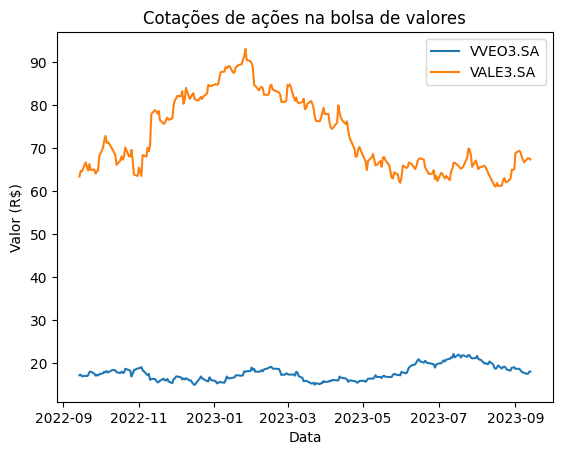

In [52]:
acao1 = 'VVEO3.SA'
acao2 = 'VALE3.SA'

ticker1 = yf.Ticker(acao1)
ticker2 = yf.Ticker(acao2)

data1 = ticker1.history(period='1y') # O período de 1 ano é suficiente?
data2 = ticker2.history(period='1y')

plt.figure()
plt.plot(data1['Close'], label=acao1)
plt.plot(data2['Close'], label=acao2)
plt.ylabel('Valor (R\$)')
plt.title('Cotações de ações na bolsa de valores')
plt.xlabel('Data')
plt.legend()
plt.show()

# Comprando ações individuais / buy-and-hold

Agora, vamos simular a situação de comprarmos algum valor (por exemplo: 1000 reais) em ações. Em quantos reais esses 1000 iniciais se converteram ao longo do tempo, considerando sempre o preço de fechamento das ações?

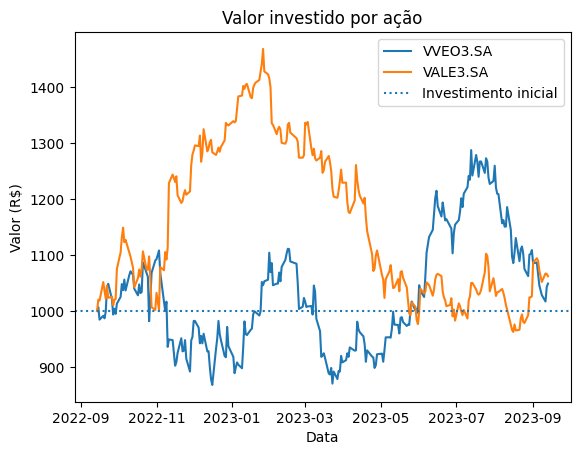

In [53]:
investimento_inicial = 1000 # reais

n_acoes1 = investimento_inicial / data1.iloc[0]['Close']
data1['Valor investido'] = n_acoes1 * data1['Close']

n_acoes2 = investimento_inicial / data2.iloc[0]['Close']
data2['Valor investido'] = n_acoes2 * data2['Close']

plt.figure()
plt.plot(data1['Valor investido'], label=acao1)
plt.plot(data2['Valor investido'], label=acao2)
plt.axhline(investimento_inicial, linestyle=':', label='Investimento inicial')
plt.ylabel('Valor (R\$)')
plt.title('Valor investido por ação')
plt.xlabel('Data')
plt.legend()
plt.show()

# Valor do portifólio

Ok, mas e se temos um portifólio com nossas duas ações? Bem, o valor investido no portifólio é a soma dos valores investidos em cada uma das nossas ações. Gostaríamos que nosso valor investido no portifólio se transformasse em um valor bem alto!!!

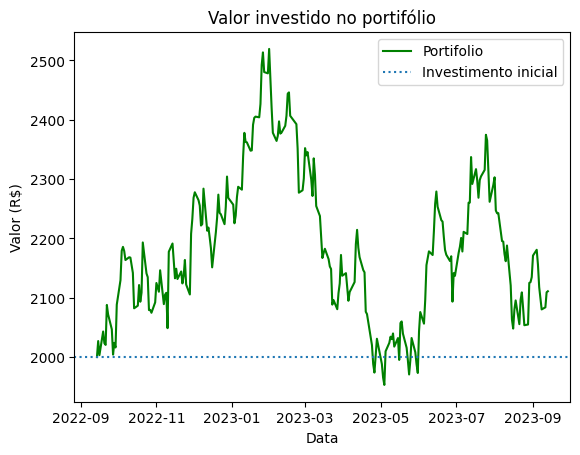

In [54]:
datap = pd.DataFrame()
datap['Valor investido'] = data1['Valor investido'] + data2['Valor investido']

plt.figure()
plt.plot(datap['Valor investido'],'g',label='Portifolio')
plt.axhline(investimento_inicial*2, linestyle=':', label='Investimento inicial')
plt.ylabel('Valor (R\$)')
plt.title('Valor investido no portifólio')
plt.xlabel('Data')
plt.legend()
plt.show()

# Retornos diários

A cada dia, há uma variação percentual do nosso valor investido. Se essa variação oscila muito, então temos que ter mais "sangue frio" para manter nosso investimento. Gostaríamos que não houvesse muita variação no retorno diário.

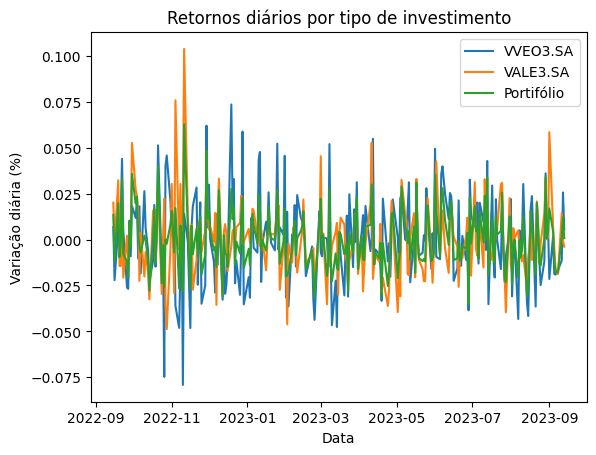

In [55]:
ret1 = data1['Valor investido'].pct_change()
ret2 = data2['Valor investido'].pct_change()
retp = datap['Valor investido'].pct_change()

plt.figure()
plt.plot(ret1, label=acao1)
plt.plot(ret2, label=acao2)
plt.plot(retp, label='Portifólio')
plt.ylabel('Variação diária (%)')
plt.title('Retornos diários por tipo de investimento')
plt.xlabel('Data')
plt.legend()
plt.show()

# Correlações

Podemos calcular as correlações entre os retornos diários das nossas ações individuais. Veja como a correlação entre a VVEO3.SA e a VALE3.SA é bem pequena:

In [56]:
df = pd.DataFrame()
df[acao1] = ret1
df[acao2] = ret2
df.corr()

,VVEO3.SA,VALE3.SA
VVEO3.SA,1.000000,0.082211
VALE3.SA,0.082211,1.000000


# Índice Sharpee

Podemos calcular o retorno de cada uma das ações e também o retorno do portifólio ao longo de todo o período. Também, podemos calcular o desvio padrão do retorno diário. Dividindo um pelo outro, temos o índice sharpee.

Veja que o retorno do portifólio está em algum lugar entre os retornos das ações individuais. Porém, o desvio padrão do portifólio é menor. Isso faz o índice Sharpee do portifólio ficar bem maior!

In [57]:
# Retornos totais ao longo de todo o período
ret_total1 = (data1.iloc[-1]['Valor investido']/data1.iloc[0]['Valor investido'] - 1)
ret_total2 = (data2.iloc[-1]['Valor investido']/data2.iloc[0]['Valor investido'] - 1)
ret_totalp = (datap.iloc[-1]['Valor investido']/datap.iloc[0]['Valor investido'] - 1)

# Desvios padrões diários
sigma1 = ret1.std()
sigma2 = ret2.std()
sigmap = retp.std()

# Índice sharpee
sharpe1 = ret_total1/sigma1
sharpe2 = ret_total2/sigma2
sharpep = ret_totalp/sigmap

print(ret_total1, ret_total2, ret_totalp)
print(sigma1, sigma2, sigmap)
print(sharpe1, sharpe2, sharpep)

0.04887707928115437 0.062051385594165565 0.055464232437659966
0.023747289732606806 0.019850738464066528 0.01587363830601023
2.058217162105976 3.125898097266756 3.4941096280781174


# Anotações importantes

Nem todas as combinações de ações no portifólio levam à diminuição do índice Sharpee. Experimente, por exemplo, usar PETR4.SA e VALE3.SA. Veja o que acontece com a correlação entre os ganhos diários e com o índice Sharpee.